In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 26 Lecture 2 Assignment

In this assignment, we will learn about linear regression model assumptions

In [2]:
import warnings

import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
# Copy pasted function from:
# https://gist.github.com/AdamSpannbauer/c99c366b0c7d5b6c4920a46c32d738e5


def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

<IPython.core.display.Javascript object>

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [4]:
lager = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv"
)
lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


<IPython.core.display.Javascript object>

We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [5]:
lager = lager.drop(columns="beer")

<IPython.core.display.Javascript object>

In [6]:
lager.isna().sum()

tpc     0
ma      0
dsa     0
asa     0
orac    0
rp      0
mca     0
dtype: int64

<IPython.core.display.Javascript object>

Split the data into train and test subsets. Select 25% of the data to be in the test subset. Use `tpc` as the y variable.

In [7]:
X = lager.drop(columns="tpc")
y = lager["tpc"]

<IPython.core.display.Javascript object>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

Next, we'll generate a linear model.

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<IPython.core.display.Javascript object>

In [10]:
model.score(X_train, y_train)

0.7939987621454903

<IPython.core.display.Javascript object>

In [11]:
model.score(X_test, y_test)

0.876528611834816

<IPython.core.display.Javascript object>

and make a residual vs. fit plot to check homoscedasticity. All Gauss-Markov assumptions should be evaluated on the training set.

How much heteroscedasticity is exhibited in the model?

In [12]:
y_pred = model.predict(X_train)
resid = y_pred - y_train

<IPython.core.display.Javascript object>

In [13]:
# According to a formal test we do not have heteroscedasticity to worry about
_, p, _, _ = het_breuschpagan(resid, sm.add_constant(X_train))
p

0.5048830234356838

<IPython.core.display.Javascript object>

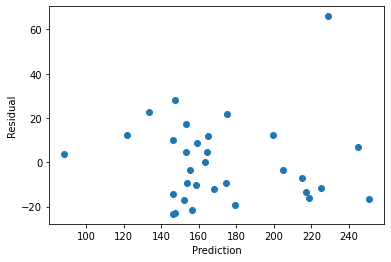

<IPython.core.display.Javascript object>

In [14]:
# According to this plot, we don't have any bad symptoms of over/under predicting
# We have one observation that we very overpredicted
plt.scatter(y_pred, resid)
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.show()

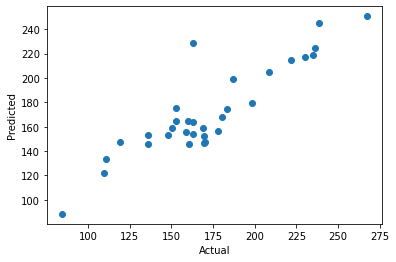

<IPython.core.display.Javascript object>

In [15]:
# This plot shows the same info
plt.scatter(y_train, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Compute the VIF for all features in the model. You will need to add a constant to your data (make a new copy just for this) to compute this with statsmodels.

How collinear are your features?

In [16]:
# Nothing above 5 so we can feel pretty good that we dont have issues to worry about
print_vif(X_train)

VIF results
-------------------------------
const    24.433233
ma        1.413320
dsa       2.872481
asa       1.732848
orac      1.639590
rp        2.341942
mca       1.435173
dtype: float64
-------------------------------



<IPython.core.display.Javascript object>

Show a histogram of your error, and then plot the qq-plot for our errors (make sure to use a standardized line to compare them appropriately to the standard distribution.)

Remember to use training data.

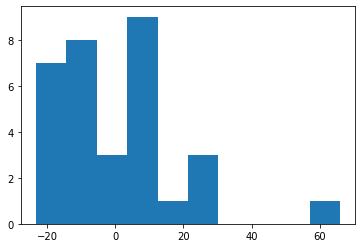

<IPython.core.display.Javascript object>

In [17]:
plt.hist(resid)
plt.show()

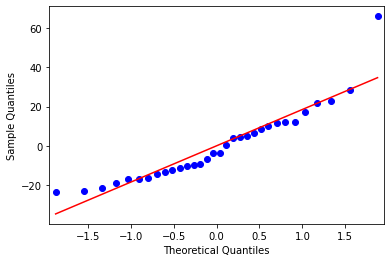

<IPython.core.display.Javascript object>

In [18]:
# If not for that one very poor prediction we'd be normal.
# We should investigate this observation. Why are we so far
# off on it? Is it a pattern breaking outlier that we might
# consider dropping?
sm.qqplot(resid, line="s")
plt.show()

Plot the actual test data against test predictions to see how well your model predicts new data.

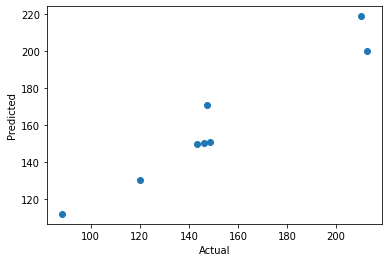

<IPython.core.display.Javascript object>

In [19]:
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()